# Notebook for doing feature engineering


In [50]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
## reading the data 

%store -r dm
dm = dm


## Making months its own feature 

Idea: The month of the year will impact the weather trend and therefore the power generation


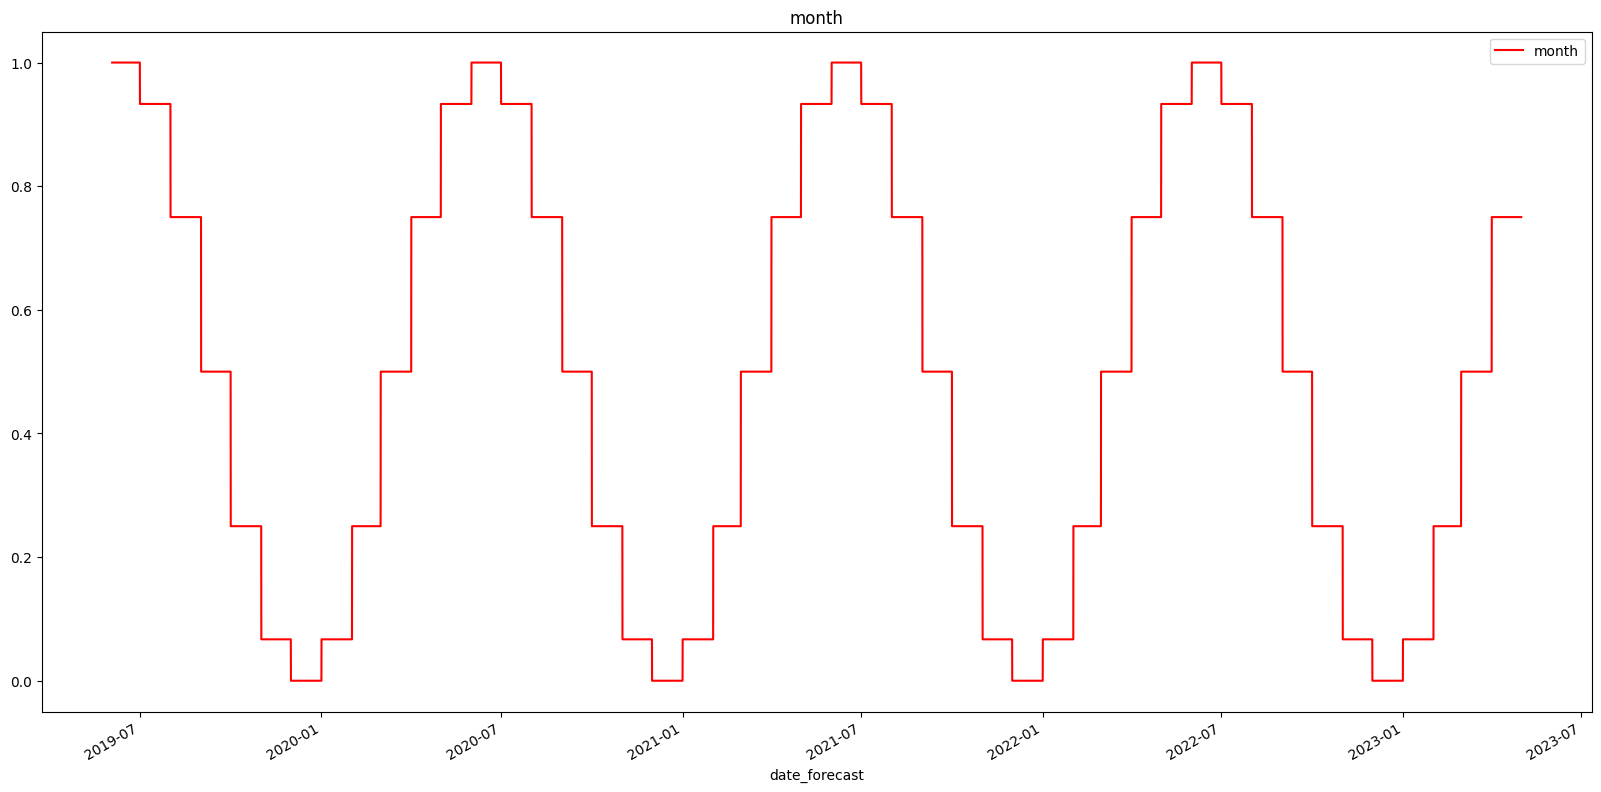

In [3]:
import numpy as np 

def month_func(x): 
    return -0.5* np.cos(2*np.pi/12 * x) + 0.5


dm.data_A["month"] = (dm.data_A["date_forecast"].dt.month)
dm.data_B["month"] = (dm.data_B["date_forecast"].dt.month)
dm.data_C["month"] = (dm.data_C["date_forecast"].dt.month)

dm.X_test_estimated_a["month"] = (dm.X_test_estimated_a["date_forecast"].dt.month)
dm.X_test_estimated_b["month"] = (dm.X_test_estimated_b["date_forecast"].dt.month)
dm.X_test_estimated_c["month"] = (dm.X_test_estimated_c["date_forecast"].dt.month)


dm.plot_feature(dm.data_A, "month")


## Making time of day its own feature

Idea: time of day matters when the sun is up and not.

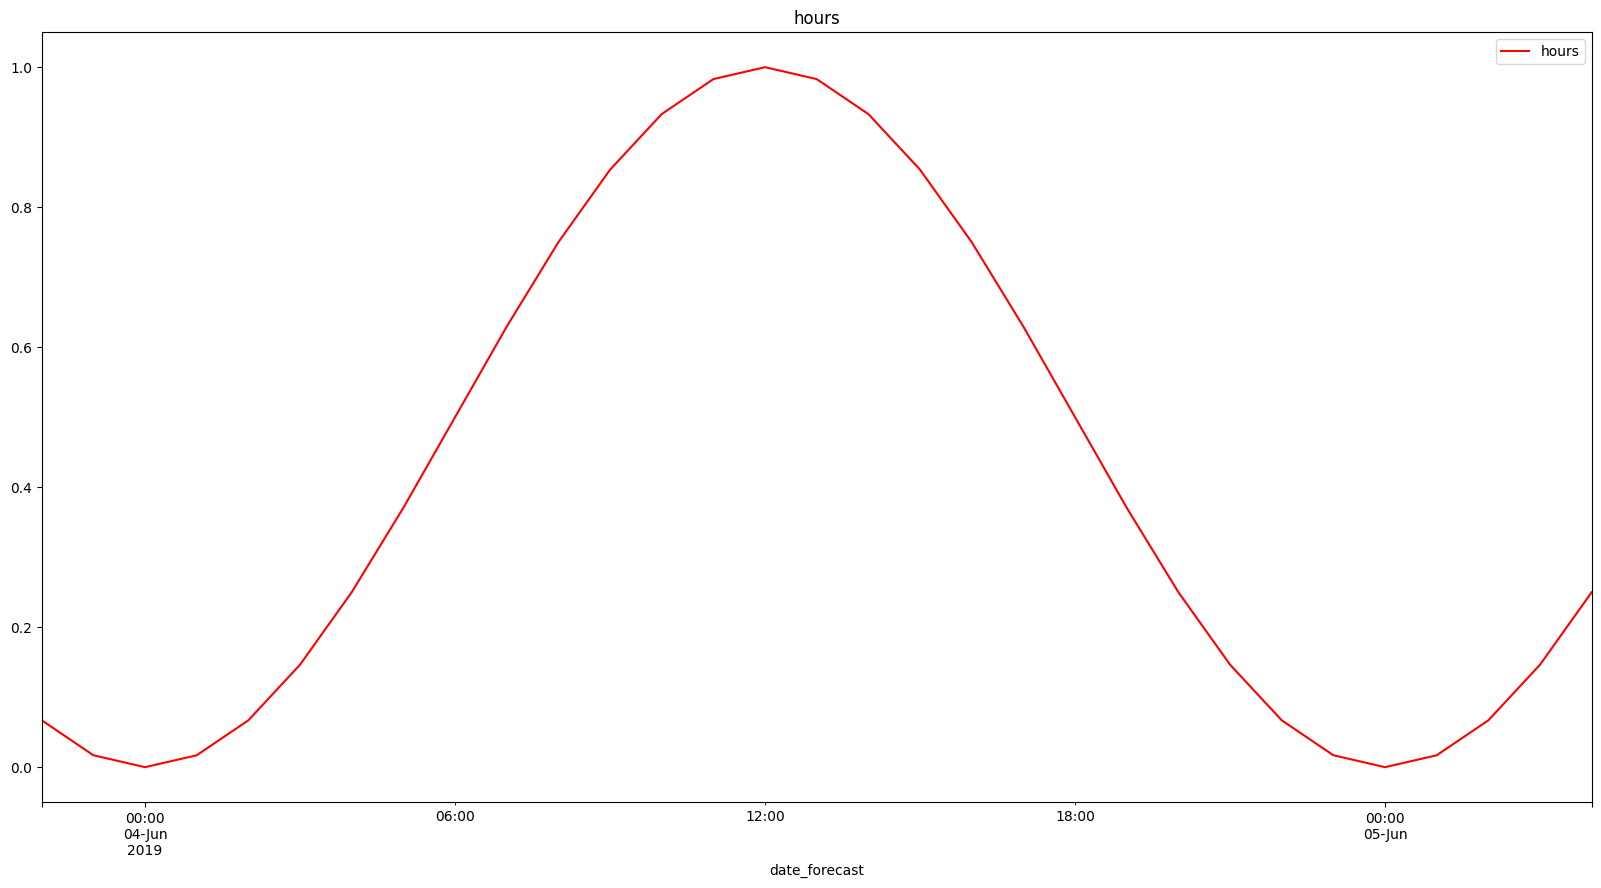

In [4]:
import numpy as np 

def hour_func(x): 
    return -0.5*np.cos(2*np.pi/24 * x) + 0.5

dm.X_test_estimated_a["hours"] = (dm.X_test_estimated_a["date_forecast"].dt.hour)
dm.X_test_estimated_b["hours"] = (dm.X_test_estimated_b["date_forecast"].dt.hour)
dm.X_test_estimated_c["hours"] = (dm.X_test_estimated_c["date_forecast"].dt.hour)

dm.data_A["hours"] =  (dm.data_A["date_forecast"].dt.hour)
dm.data_B["hours"] = (dm.data_B["date_forecast"].dt.hour)
dm.data_C["hours"] = (dm.data_C["date_forecast"].dt.hour)


dm.plot_feature(dm.data_A.iloc[24:55], "hours")


## Making the sum of radiation its own feature 

Idea: we know from the feature scores that radiation is one of the most important ones. Therefore we make a feature that is its sum to emphisise its contribution. 

In [54]:

dm.data_A["sum_rad:W"] = (dm.data_A["clear_sky_rad:W"] + dm.data_A["diffuse_rad:W"] + dm.data_A["direct_rad:W"])/3
dm.data_B["sum_rad:W"] = (dm.data_B["clear_sky_rad:W"] + dm.data_B["diffuse_rad:W"] + dm.data_B["direct_rad:W"])/3
dm.data_C["sum_rad:W"] = (dm.data_C["clear_sky_rad:W"] + dm.data_C["diffuse_rad:W"] + dm.data_C["direct_rad:W"])/3

dm.X_test_estimated_a["sum_rad:W"] = (dm.X_test_estimated_a["clear_sky_rad:W"] + dm.X_test_estimated_a["diffuse_rad:W"] + dm.X_test_estimated_a["direct_rad:W"])/3
dm.X_test_estimated_b["sum_rad:W"] = (dm.X_test_estimated_b["clear_sky_rad:W"] + dm.X_test_estimated_b["diffuse_rad:W"] + dm.X_test_estimated_b["direct_rad:W"])/3
dm.X_test_estimated_c["sum_rad:W"] = (dm.X_test_estimated_c["clear_sky_rad:W"] + dm.X_test_estimated_c["diffuse_rad:W"] + dm.X_test_estimated_c["direct_rad:W"])/3


## Removing features 

Removing features not importatnt for the model makes the data smaller in complexity, this could help the model generalize.

Also, removing redundancy will help the data explainability as the set gets smaller whilst containing the same information

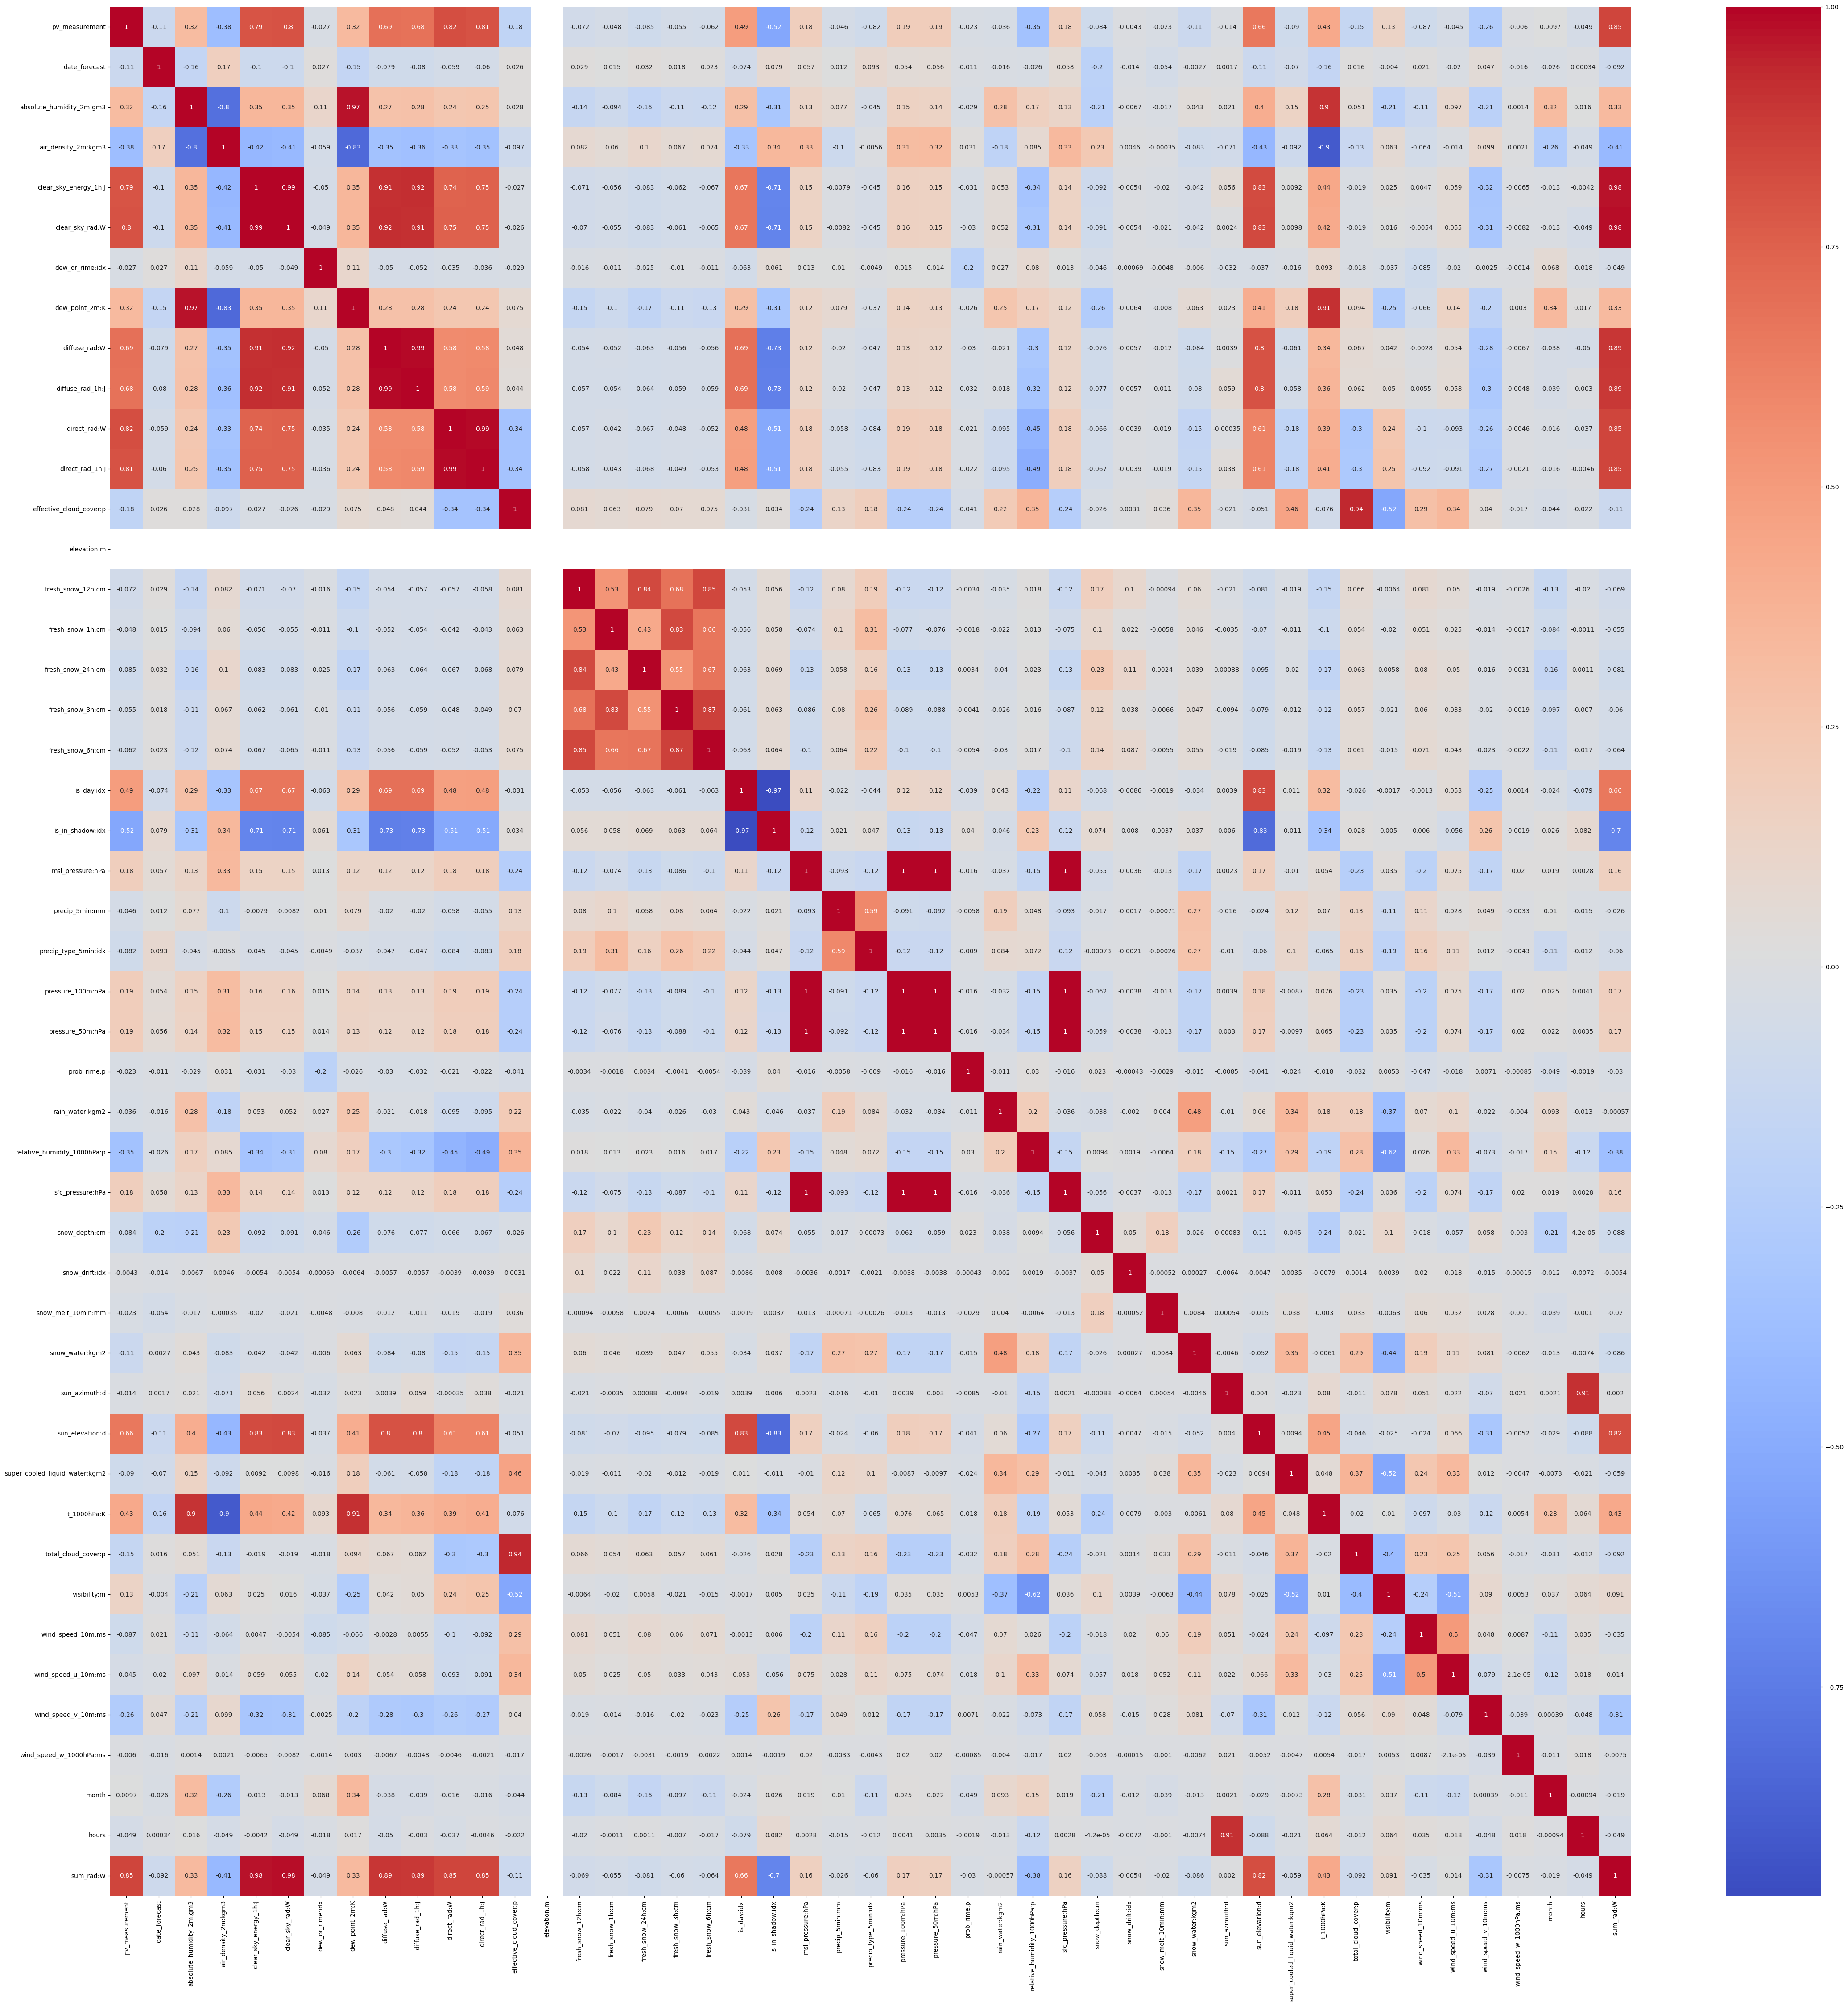

'"\nplt.figure(figsize=(55,55))\ncor = dm.X_test_estimated_c.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.Reds)\nplt.show()\n\nplt.figure(figsize=(55,55))\ncor = dm.X_test_estimated_c.corr()\nsns.heatmap(cor, annot=True, cmap=plt.cm.Reds)\nplt.show() '

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns

## Using Pearson Correlation
plt.figure(figsize=(55,55))
cor = dm.data_B.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.coolwarm)
plt.show()
""""
plt.figure(figsize=(55,55))
cor = dm.X_test_estimated_c.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

plt.figure(figsize=(55,55))
cor = dm.X_test_estimated_c.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show() """

# Koffår blir disse annerledes? Datasettene e vel strukturert likt? 


From the heatmap we can see that 
- clear sky energy and clear sky radiation is strongly correlated and we can remove one. 
- diffuse rad : W and diffuse rad :J are strongly correlated and we can remove one. 
- direct radiations are strongly correlated, we remove one. (here we decide wether to use the sum of radiations or one of the columns)
- all the fresh snow correlate, only differ by how long period they measure. So for instance, fresh snow 12h correlate less to the 1h one, making sense. we remove 12h 6h 3h, leaving 24h and 1h. 
- we consider removing "is day" as its redundant, its strongly correlated to both radiation measures and clear sky energy, making it tell the same story. 
- remove effective cloud cover as its strongly correlated to total cloud cover 
- remove dew point or t_1000kh as they are strongly correlated 
- the snow density features does not contain enough values and should be removed 

Else, everything under a 0.2 in correlation to pv-measurement should be considered removed as it makes the data complex without providing information. 

In [77]:
import helpers


dropped = helpers.drop_feature([dm.data_A, dm.data_B, dm.data_C, dm.X_test_estimated_a, dm.X_test_estimated_b, dm.X_test_estimated_c], ["clear_sky_energy_1h:J",
                                                                                                                                        "diffuse_rad_1h:J", 
                                                                                                                                        'diffuse_rad:W', 
                                                                                                                                        'direct_rad:W', 
                                                                                                                                        'fresh_snow_12h:cm', 
                                                                                                                                        'fresh_snow_3h:cm', 
                                                                                                                                        'fresh_snow_6h:cm', 
                                                                                                                                        'is_day:idx', 
                                                                                                                                        'pressure_100m:hPa', 
                                                                                                                                        'direct_rad_1h:J', 
                                                                                                                                        'snow_depth:cm', 
                                                                                                                                        'snow_drift:idx',
                                                                                                                                        'effective_cloud_cover:p', 
                                                                                                                                        'air_density_2m:kgm3',
                                                                                                                                        'wind_speed_u_10m:ms', 
                                                                                                                                        'wind_speed_v_10m:ms',
                                                                                                                                        'super_cooled_liquid_water:kgm2',
                                                                                                                                        't_1000hPa:K',
                                                                                                                                        'precip_5min:mm',
                                                                                                                                        'elevation:m',
                                                                                                                                        'clear_sky_rad:W',
                                                                                                                                        'sun_azimuth:d',                                                       
                                                                                                                                        ])

(dropped[0].columns)

dm.data_A = dropped[0]
dm.data_B = dropped[1]
dm.data_C = dropped[2]

dm.X_test_estimated_a = dropped[3]
dm.X_test_estimated_b = dropped[4]
dm.X_test_estimated_c = dropped[5]


### Running the store block will store the datasets from this notebook, with its engineered features, to be used in other notebooks


In [55]:
%store dm

Stored 'dm' (Data_Manager)


### Store dm in a file to later retrieve from another directory

In [8]:
from data_prep import dm_saver

dms = dm_saver.DM_Saver()
dms.set_data(dm)
dms.save('dms')